In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt
from customxgboost import XGBoostClassifier, XGBoostTree
from fedXGB import Client, FedXGBoost
from customxgboost import XGBoostClassifier as myxgb


In [25]:
# Generate dummy data
def create_dummy_data(n_samples = 10000, n_features = 50, n_informative = 22, n_redundant = 0, random_state = 42):

    # Create the dataset
    X, y = make_classification(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=n_informative,
        n_redundant=n_redundant,
        n_classes=2,
        random_state=random_state
    )

    # Convert to DataFrame for convenience
    df = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(n_features)])
    df['label'] = y

    return df

In [26]:
data = create_dummy_data()

In [27]:
data

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,label
0,-0.965578,2.014337,1.304948,-0.263716,-1.316722,-2.858768,0.504930,-0.038123,-1.004650,0.050190,...,0.279948,-0.413537,2.993163,2.686999,-3.209502,-0.334316,-0.389815,1.391927,4.077872,0
1,-0.060676,2.841532,1.545377,-1.008556,-3.739762,-1.042760,0.251505,-0.530244,0.701185,0.365841,...,1.151709,-0.195181,-0.987324,-0.616296,-0.888070,-0.565869,1.000247,-2.906827,4.650249,0
2,-0.974993,0.311695,-0.345325,3.833465,-5.186574,-2.465071,0.358524,0.726672,-0.952411,-2.020802,...,-0.249303,-1.437342,-5.082394,2.903608,0.347030,0.705287,1.303845,-0.346168,-3.926308,1
3,1.311640,-0.364093,-0.712941,4.632278,5.487199,-2.189364,0.164921,1.306483,-0.106323,-2.106583,...,0.120902,1.283569,0.986424,-3.682525,1.558381,1.084343,-1.181520,4.989259,-3.556676,1
4,-1.064194,2.087427,-1.644542,-5.336649,0.541658,-2.581079,0.775316,0.404348,-0.892770,-0.271077,...,-0.433229,0.842034,-6.739371,5.395256,-0.350449,-2.504215,0.238973,1.488026,-1.133317,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.284475,4.514648,-0.428078,0.985517,-0.287865,2.592347,1.297024,-0.883268,0.481412,1.407412,...,-0.349594,-0.664569,1.101720,2.489071,2.841612,-0.893655,-0.505860,3.063603,-1.742990,1
9996,1.240408,-3.092857,-0.567628,-5.552889,2.974017,-1.180545,1.151699,-0.752613,-0.540279,-0.106806,...,0.733743,1.032377,4.366228,-4.551377,2.703655,0.221014,-0.577173,-2.660996,1.177999,1
9997,1.037231,-4.379919,-0.415912,-1.039583,1.564774,1.677834,0.284484,0.651468,0.533572,1.085217,...,-0.088167,0.509011,1.125695,3.780190,-4.230781,0.495385,1.185857,-0.668642,2.295591,0
9998,-0.763016,3.490112,-0.718283,1.139012,0.947920,-0.302213,-0.450223,0.084048,0.178338,-1.275224,...,-0.818252,3.281800,-0.466511,-5.620057,0.392150,-1.182447,0.930227,-2.287695,0.490727,0


In [28]:
# split data into train and test sets
X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# fit model no training data
model = xgb.XGBClassifier(n_estimators=50, max_depth=10, learning_rate=0.3)
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.88%


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

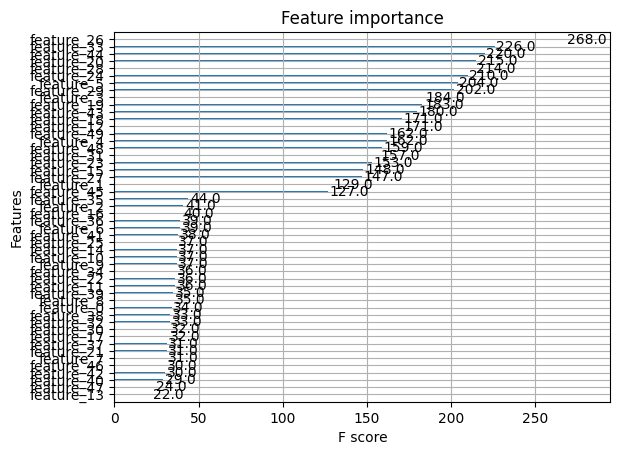

In [29]:
# plot feature importance
xgb.plot_importance(model)

In [30]:


# my_model = myxgb()
# my_model.fit(X_train, y_train, boosting_rounds=3, depth=10, learning_rate=0.3, subsample_cols=1, gamma=1, lambda_=1, min_child_weight=1)

# # make predictions for test data
# y_pred = my_model.predict(X_test)
# predictions = [round(value) for value in y_pred]

# # evaluate predictions
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))


In [31]:
# # accuracy on training data
# y_pred = my_model.predict(X_train)
# predictions = [round(value) for value in y_pred]
# accuracy = accuracy_score(y_train, predictions)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
my_model = myxgb(method='hist')
my_model.fit(X_train, y_train, boosting_rounds=20, depth=10, avg_splits=2, learning_rate=0.3, gamma=1, lambda_=1, min_child_weight=1)

# make predictions for test data
y_pred = my_model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Getting regions
Booster 1 complete
Getting regions
Booster 2 complete
Getting regions
Booster 3 complete
Getting regions
Booster 4 complete
Getting regions
Booster 5 complete
Getting regions
Booster 6 complete
Getting regions
Booster 7 complete
Getting regions
Booster 8 complete
Getting regions
Booster 9 complete
Getting regions
Booster 10 complete
Getting regions
Booster 11 complete
Getting regions
Booster 12 complete
Getting regions
Booster 13 complete
Getting regions
Booster 14 complete
Getting regions
Booster 15 complete
Getting regions
Booster 16 complete
Getting regions
Booster 17 complete
Getting regions
Booster 18 complete
Getting regions
Booster 19 complete
Getting regions
Booster 20 complete
Training Complete
Accuracy: 87.48%


In [34]:
# accuracy on training data
y_pred = my_model.predict(X_train)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_train, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 94.52%


In [13]:
# max_bins = 100000 # each client must have the same bin size

max_bins = 10240
# create 3 clients
client1 = Client(X_train[:3000], y_train[:3000], max_bins=max_bins, cliend_id=1)
client2 = Client(X_train[3000:6000], y_train[3000:6000], max_bins=max_bins, cliend_id=2)
client3 = Client(X_train[6000:], y_train[6000:], max_bins=max_bins, cliend_id=3)

# create a federated model with the 3 clients
fed_model = FedXGBoost()

fed_model.fit([client1, client2, client3], max_bins=max_bins)

Initializing Clients
Optimized: Getting regions
Optimized: Getting regions
Optimized: Getting regions


In [14]:
# train the model
fed_model.train(subsample_cols=0.8, boosting_rounds=25, depth=10, learning_rate=0.1)

Boosting round 1 done.
Boosting round 2 done.
Boosting round 3 done.
Boosting round 4 done.
Boosting round 5 done.
Boosting round 6 done.
Boosting round 7 done.
Boosting round 8 done.
Boosting round 9 done.
Boosting round 10 done.
Boosting round 11 done.
Boosting round 12 done.
Boosting round 13 done.
Boosting round 14 done.
Boosting round 15 done.
Boosting round 16 done.
Boosting round 17 done.
Boosting round 18 done.
Boosting round 19 done.
Boosting round 20 done.
Boosting round 21 done.
Boosting round 22 done.
Boosting round 23 done.
Boosting round 24 done.
Boosting round 25 done.
Training Complete


In [15]:

fed_model.train(subsample_cols=0.8, boosting_rounds=25, depth=10, learning_rate=0.1, gamma=0, lambda_=1)

Boosting round 1 done.
Boosting round 2 done.
Boosting round 3 done.
Boosting round 4 done.
Boosting round 5 done.
Boosting round 6 done.
Boosting round 7 done.
Boosting round 8 done.
Boosting round 9 done.
Boosting round 10 done.
Boosting round 11 done.
Boosting round 12 done.
Boosting round 13 done.
Boosting round 14 done.
Boosting round 15 done.
Boosting round 16 done.
Boosting round 17 done.
Boosting round 18 done.
Boosting round 19 done.
Boosting round 20 done.
Boosting round 21 done.
Boosting round 22 done.
Boosting round 23 done.
Boosting round 24 done.
Boosting round 25 done.
Training Complete


In [16]:
fed_model.train(subsample_cols=0.9, boosting_rounds=25, depth=15, learning_rate=0.1, gamma=0, lambda_=1)

Boosting round 1 done.
Boosting round 2 done.
Boosting round 3 done.
Boosting round 4 done.
Boosting round 5 done.
Boosting round 6 done.
Boosting round 7 done.
Boosting round 8 done.
Boosting round 9 done.
Boosting round 10 done.
Boosting round 11 done.
Boosting round 12 done.
Boosting round 13 done.
Boosting round 14 done.
Boosting round 15 done.
Boosting round 16 done.
Boosting round 17 done.
Boosting round 18 done.
Boosting round 19 done.
Boosting round 20 done.
Boosting round 21 done.
Boosting round 22 done.
Boosting round 23 done.
Boosting round 24 done.
Boosting round 25 done.
Training Complete


In [17]:
# predictions for 25 rounds
preds = fed_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, preds)}")
print(f"Precision: {precision_score(y_test, preds)}")
print(f"Recall: {recall_score(y_test, preds)}")
print(f"F1 Score: {f1_score(y_test, preds)}")

Accuracy: 0.8393939393939394
Precision: 0.8480744815911976
Recall: 0.8213114754098361
F1 Score: 0.8344784509681449


In [18]:
# predictions for next model
preds = fed_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, preds)}")
print(f"Precision: {precision_score(y_test, preds)}")
print(f"Recall: {recall_score(y_test, preds)}")
print(f"F1 Score: {f1_score(y_test, preds)}")

Accuracy: 0.8393939393939394
Precision: 0.8480744815911976
Recall: 0.8213114754098361
F1 Score: 0.8344784509681449


In [19]:
# predictions for 3rd model
preds = fed_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, preds)}")
print(f"Precision: {precision_score(y_test, preds)}")
print(f"Recall: {recall_score(y_test, preds)}")
print(f"F1 Score: {f1_score(y_test, preds)}")

Accuracy: 0.8393939393939394
Precision: 0.8480744815911976
Recall: 0.8213114754098361
F1 Score: 0.8344784509681449


In [20]:
# accuracy on training data
y_pred = fed_model.predict(X_train)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_train, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 88.96%


In [21]:
# test xgboost classifier from pytho
model = xgb.XGBClassifier()

model.fit(X_train, y_train)
preds = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, preds)}")
print(f"Precision: {precision_score(y_test, preds)}")
print(f"Recall: {recall_score(y_test, preds)}")
print(f"F1 Score: {f1_score(y_test, preds)}")


Accuracy: 0.9418181818181818
Precision: 0.9373983739837398
Recall: 0.9450819672131148
F1 Score: 0.9412244897959183
